# AMPSphere v.2022-03 

This is a notebook meant to form the set of notebooks used to analyze the data in AMPSphere and write the manuscript:

__AMPSphere: Global survey of prokaryotic antimicrobial peptides shaping microbiomes__

Figures generated in this script formed the panel shown in Figure S1.

### Comparison of c_AMPs and other validated proteins

Here we will show how c_AMPs from AMPSphere are relatively similar to those in the training set of Macrel (Santos-Júnior et al., 2020) and DRAMP 3.0 (Shi et al., 2021). To that, we will use pre-computed features calculated using Macrel's internal scripts from the peptide sequences in those three databases.

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# import datasets
ampsphere = pd.read_csv('../data_folder/ampsphere_v2022-03.features.tsv.gz', sep="\t")
dramp = pd.read_csv('../data_folder/dramp_v3.features.tsv.gz', sep="\t")
macrel = pd.read_csv('../data_folder/macrel_trainpos.features.tsv.gz', sep="\t")

Macrel's internal script to compute features did not use the protein length as a feature, and therefore, to compare it through these different datasets, we will need to compute it:

In [3]:
# computing protein length
ampsphere['length'] = ampsphere.sequence.apply(lambda x: len(x))
dramp['length'] = dramp.sequence.apply(lambda x: len(x))
macrel['length'] = macrel.sequence.apply(lambda x: len(x))

We are also cleaning some dummy columns that Macrel uses to its internal pipeline and we won't be using here:

In [4]:
ampsphere.drop(['group',
                'sequence'],
               axis=1,
               inplace=True)

dramp.drop(['group',
            'sequence'],
           axis=1,
           inplace=True)

macrel.drop(['group',
             'sequence'],
            axis=1,
            inplace=True)

We determined a function to calculate the maximum and minimum of each feature. With these values, we can determine the limits of the axis. 

In [5]:
def getminmax(feat, ampsphere, dramp, macrel):
    a, b = [], []
    for j in [ampsphere, dramp, macrel]:
        a.append(j[feat].min())
        b.append(j[feat].max())
    return min(a), max(b)

Actively iterating over the features to generate the complete figure:

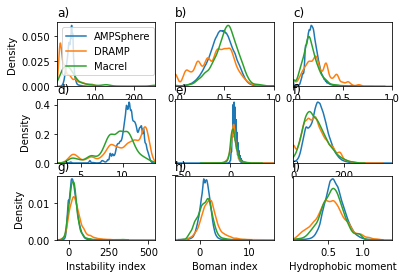

In [10]:
# initializing axis array, and graph_keys
fig, axarr = plt.subplot_mosaic([
                                 ['a)', 'b)', 'c)'],
                                 ['d)', 'e)', 'f)'],
                                 ['g)', 'h)', 'i)'],
                                 ])


graphkey = {
            'a)': ['length', 'Length (residues)'], 
            'b)': ['smallAA', 'Small residues'],
            'c)': ['basicAA', 'Basic residues'],
            'd)': ['pI', 'Isoelectric point'],
            'e)': ['charge', 'Charge at pH 7.0'],
            'f)': ['aindex', 'Aliphatic index'],
            'g)': ['instaindex', 'Instability index'],
            'h)': ['boman', 'Boman index'],
            'i)': ['hmoment', 'Hydrophobic moment']
            }

for k in graphkey:
   feat, label = graphkey[k]
   sns.kdeplot(ax=axarr[k],
               data=ampsphere,
               x=feat,
               label='AMPSphere')
   
   sns.kdeplot(ax=axarr[k],
               data=dramp,
               x=feat,
               label='DRAMP')
    
   sns.kdeplot(ax=axarr[k],
               data=macrel,
               x=feat,
               label='Macrel')

   axarr[k].set_xlabel(label)

   axarr[k].set_xlim(getminmax(feat,
                               ampsphere,
                               dramp,
                               macrel))
   if k == 'a)':
       axarr[k].legend()

   if k not in ['a)', 'd)', 'g)']:
       axarr[k].set_yticks([])
       axarr[k].set_ylabel(None)

for label, ax in axarr.items():
    ax.set_title(label,
                 fontfamily='Sans Serif',
                 fontsize='large',
                 loc='left')